(c) Kevin Dunn, All content is under Creative Commons Attribution CC-BY 4.0 and all code is under BSD-3 clause.
Please reuse, remix, revise, and reshare this content in any way, keeping this notice! 


In [9]:
# Standard imports required to show plots and tables
from matplotlib import pyplot
from IPython.display import display
%matplotlib inline

Over the next few notebooks we will look at basic data plots:

1. Bar plots (bar charts) **`<-- this notebook`**
1. Histograms
1. Time-series, or a sequence plot
1. Scatter plot
1. Data tables





## Website data case study

**Step 1**: always define your objective: we have recorded visits to a small website. Which day of the week is the most popular, and which is the least popular? [*If we absolutely need to take the site offline, we can pick a day which has minimal disruption*]

**Step 2**: load the data, view it and use the ``.describe()`` function:

You can read more, and download the data from here: http://openmv.net/info/website-traffic 


**Step 3**: use the data to solve your problem. 

Let's go ahead with steps 2 and 3.

### Step 2: Load the data.

Refer back to the module on loading data from a CSV file, if needed. 

In [ ]:
import pandas as pd
website = pd.read_csv('http://openmv.net/file/website-traffic.csv')
print(website.head())
print(website.tail())
website.describe()

So it seems like we have data from 1 June 2009 till 31 December 2009 here, sorted in order.

If you are paying attention, you will notice that the ``.head()`` command gives information about more columns than ``.describe()``. 

That is because, by default, ``.describe()`` will only describe numeric columns. To see a summary of all columns, use the following:

In [ ]:
website.describe(include='all')

We see that `DayOfWeek` has 7 unique values, which is expected.

`DayOfWeek` is not a quantitative (numeric) column. So we cannot calculate the average, the minimum, the maximum, etc, which is why those rows in the summary table are `NaN` (not a number).

Columns `Year` and ``Visits`` are quantitative, so those averages, minimums, maximums, etc can be quantified.

In contrast, `DayOfWeek` can be collected in groups (categories), and then we can count the number of data items in that group. For example, we could ask how many rows (in our dataset) are on "Monday". When we can can group rows into categories, we call it ``Categorical`` data.


Plenty of data you will work with are categorical. Some examples:
* *type of operating system*: Linux, Mac, Windows,...
* *colour eyes*: grey, blue, green, brown, ...
* *shape of object*: square, circular, rectangular, ...

### Check:

* Name/describe some other examples of categorical data you have worked with recently.
* Which of these are categorical, and which are quantitative?

    * Number of years of education since high-school
    * Highest level of education achieved
    * 1st year student, 2nd year student, 3rd year student, ...
    * Relationship status
    * Fuel type used in cars
    * Octane number
    * Type of sweetener used: sugar, honey, stevia, maple syrup, ...

In [5]:
# Drop out the "Year" column: it is 2009 for all rows, so it provides little value.
website = website.drop(columns='Year')

### Step 3:Show a bar plot of the average number of website visits, grouped per day.

So we would like to see a chart with 7 bars, and the size of the bar represents the average number of visitors on that day.

Luckily Pandas provides a function that does that for us: ``.groupby(...)``. It will group the data by a given categorical column.

```python
website.groupby('DayOfWeek')```

But once the rows have been grouped, you need to indicate what you want to do within those groups. Here are some examples:

```python
    website.groupby('DayOfWeek').mean()   # calculate the average per group for the other columns
    website.groupby('DayOfWeek').count()
    website.groupby('DayOfWeek').max()    # once grouped, calculate the maximum per group
    website.groupby('DayOfWeek').min()

```


In [10]:
# Now we are ready to generate the barplot:

# Get the data in a variable
average_visits_per_day = website.groupby('DayOfWeek').mean()  
display(average_visits_per_day)

,Visits
DayOfWeek,
Friday,20.766667
Monday,25.322581
Saturday,15.266667
Sunday,17.633333
Thursday,23.709677
Tuesday,25.774194
Wednesday,26.741935


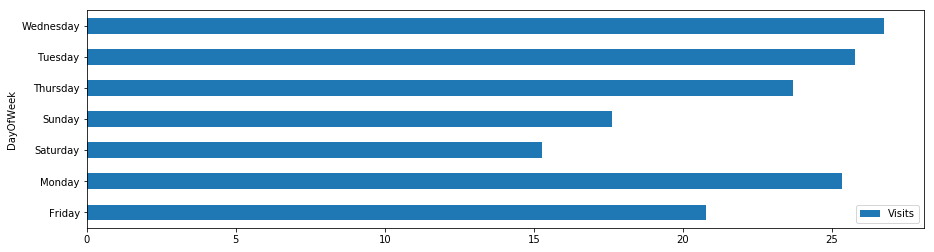

In [13]:
# And plot the data
average_visits_per_day.plot.barh(figsize=(15, 4));

### Checks:

1. The most visits, *on average*, occur on a \_\_\_\_day.
2. If the website should go offline for an entire day, the best day to pick would be a \_\_\_\_day.
3. Is the bar plot strictly necessary in this case study when compared to the data table? *In other words*, what value does the bar plot provide, if any, that is not provided by the table?

### Summary, and improvements

![alt="Bar plot terminology"](images/summarizing-data/barplot-example-expenses.png)

* A bar plot should be used when there are many categories.
* The category axis can be shown on the vertical axis (makes it more readable), but on the horizontal axis is also possible.
* The text can sometimes be added *inside the bar* if there is restricted space.
* An interesting characteristic of a bar plot is that **the *interpretation* of a bar plot does not differ if the category axis is reordered.** It can be easier to interpret the plot with a particular ordering; however, the interpretation won't be *different* if using a different ordering. The example below demonstrates this: the interepretation has not changed, but the visualization is far more effective.


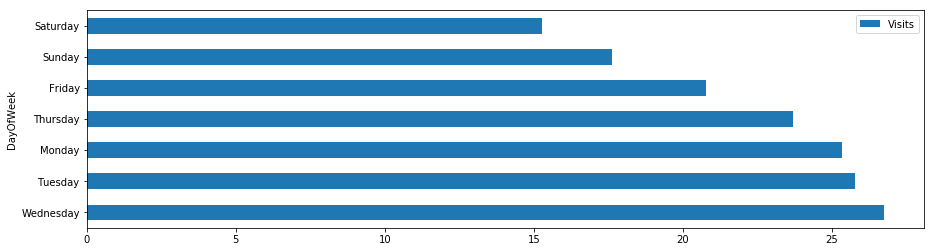

In [8]:
# Take the same grouped data from before, except sort it now:
sorted_data = average_visits_per_day.sort_values('Visits', ascending=False)  
sorted_data.plot.barh(figsize=(15, 4));